In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [51]:
df = pd.read_csv(r"C:\Users\a\OneDrive\Desktop\ML\data\homework.csv")
df.head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [52]:
X = df.drop(columns=['Price'])
y = df['Price']


In [53]:
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [56]:
y_pred = model.predict(X_test)


In [57]:
errors = np.abs(y_test - y_pred)


In [58]:
threshold = np.percentile(errors, 25)  # مثلا 25% کمترین خطاها
good_houses_idx = errors <= threshold


In [59]:
recommended_houses = X_test[good_houses_idx].copy()
recommended_houses['Actual Price'] = y_test[good_houses_idx]
recommended_houses['Predicted Price'] = y_pred[good_houses_idx]


In [60]:
print("results:")
print(recommended_houses)


results:
      Area  Room  Parking  Warehouse  Elevator  Address  Price(USD)  \
2644   156     1     True       True     False       13     11500.0   
315     70     3     True       True      True      118    350000.0   
1373   214     2     True       True     False      146     63000.0   
1766   196     2     True       True      True       10     54600.0   
32     239     2     True       True      True      190    262400.0   
...    ...   ...      ...        ...       ...      ...         ...   
1399   195     1     True       True      True      100     75000.0   
162    196     2     True       True      True       26    100000.0   
2843     6     2     True       True      True      111    105000.0   
547    231     2     True       True      True      122    140000.0   
568    137     3     True       True      True      189    990000.0   

      Actual Price  Predicted Price  
2644  3.450000e+08     3.450000e+08  
315   1.050000e+10     1.050000e+10  
1373  1.890000e+09     1

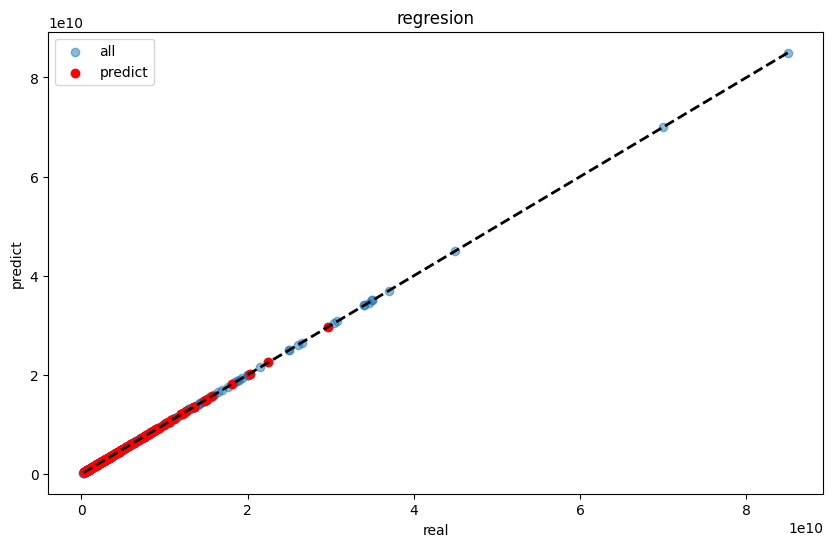

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='all')
plt.scatter(y_test[good_houses_idx], y_pred[good_houses_idx], color='red', label='predict')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("real")
plt.ylabel("predict")
plt.legend()
plt.title("regresion")
plt.show()

✅best model Shahr-e-Ziba

 best of house
Address Name
Shahr-e-Ziba              10
Saadat Abad                9
East Ferdows Boulevard     8
Punak                      7
West Ferdows Boulevard     7
                          ..
Ozgol                      1
Ray                        1
Hor Square                 1
Narmak                     1
Zaferanieh                 1
Name: count, Length: 67, dtype: int64


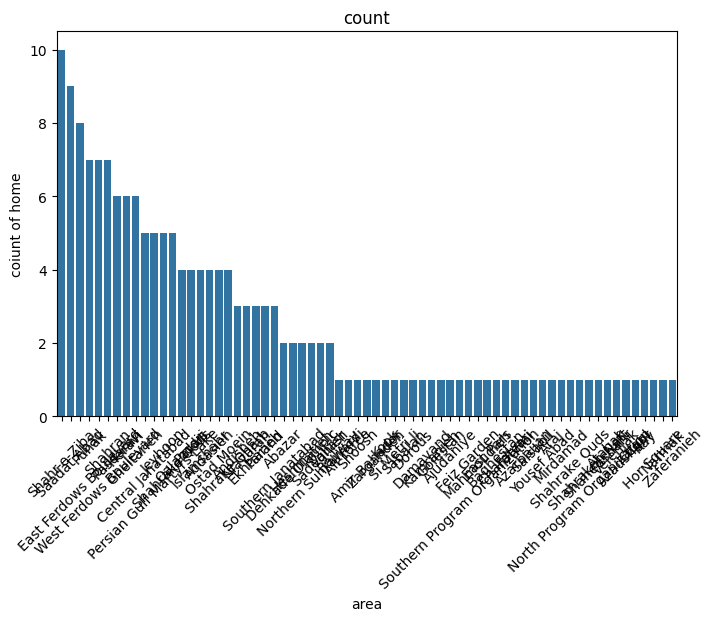

In [62]:

if 'Address' in df.columns:
    # آماده‌سازی دوباره
    X_region = X.copy()
    le_region = LabelEncoder()
    X_region['Address'] = le_region.fit_transform(df['Address'])
    
    # تقسیم داده
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_region, y, test_size=0.2, random_state=42)
    
    # آموزش مدل کلی
    model_r = LinearRegression()
    model_r.fit(X_train_r, y_train_r)
    y_pred_r = model_r.predict(X_test_r)
    
    # اختلاف قیمت
    errors_region = np.abs(y_test_r - y_pred_r)
    threshold_region = np.percentile(errors_region, 25)
    good_houses_region = errors_region <= threshold_region
    
    # خانه‌های پیشنهادی
    recommended_df = X_test_r[good_houses_region].copy()
    recommended_df['Actual Price'] = y_test_r[good_houses_region]
    recommended_df['Predicted Price'] = y_pred_r[good_houses_region]
    
  
    recommended_df['Address Name'] = le_region.inverse_transform(X_test_r['Address'][good_houses_region])
    
    # شمارش تعداد خانه مناسب در هر منطقه
    region_counts = recommended_df['Address Name'].value_counts()
    
    # چاپ منطقه مناسب
    best_region = region_counts.idxmax()
    print(f"✅best model {best_region}")
    print("\n best of house")
    print(region_counts)
    
    # نمودار
    plt.figure(figsize=(8, 5))
    sns.barplot(x=region_counts.index, y=region_counts.values)
    plt.title("count")
    plt.ylabel("coiunt of home")
    plt.xlabel("area")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("not found")
